# Práctica Guiada: Clustering

## 1. Preparando los datos

# <center>
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_z4GT2bY3HmLtHlRmRVm1oygMgUUvz6o8ryX3vAMo65iIftAD'>


### Introducción

**Objetivo:** Realizar una análisis de clustering a partir del algoritmo _k-means_ utilizando el viejo y ya ampliamente conocido dataset de _iris_

Primero vamos a importar las librerías necesarias:

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

Usaremos **Scikit-Learn** para nuestro análisis

In [2]:
#Importamos IRIS data set
iris_dataset = datasets.load_iris()

Dado que este dataset ya está "formateado" del modo que `sklearn` necesita, es posible utilizar los métodos que tiene este objeto para ver la información:

In [3]:
iris_dataset.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
y = iris_dataset.target

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
#Armamos las primeras cuatro columnas
df = pd.DataFrame(iris_dataset.data,  columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])

#Revisamos las primeras filas
df.head(n=5)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Ahora vamos a plotear los datos para ver las distribuciones:

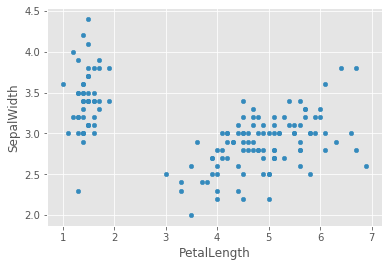

In [9]:
df.plot(kind='scatter',x='PetalLength',y='SepalWidth');

Si ejecutamos este gráfico varias veces usando combinaciones de factores diferentes - podemos ver que independientemente de los factores que tracemos, parece que hay dos grupos distintos emergentes - esto nos ayudará con la siguiente parte de nuestro análisis: ejecutar la prueba k-means

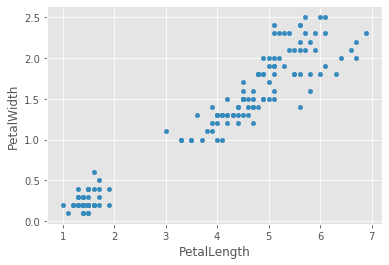

In [10]:
df.plot(kind='scatter',x='PetalLength',y='PetalWidth');

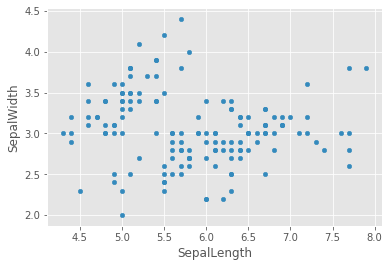

In [11]:
df.plot(kind='scatter',x='SepalLength',y='SepalWidth');

## 2. Implementando el clustering

#### Antes de realizar la prueba de k-means, todavía hay algunas transformaciones que hacer:

¿Necesitamos normalizar? ¿Pueden tener escalas distintas los features que se usan para calcular distancias?

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(df)

Vamos a establecer __k=2__ dado el comportamiento que vimos arriba en nuestros gráficos.

In [13]:
k = 2

#Como siempre, suele ser una buena práctica fijar la semilla
kmeans = cluster.KMeans(n_clusters=k, random_state=0) 

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Podemos llamar a los atributos del modelo para obtener las ubicaciones de los centroides y sus etiquetas:

In [14]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [15]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
centroids

array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 0.50728948, -0.42663134,  0.65249366,  0.62744675]])

Otra forma de obtener las etiquetas es utilizar el método **fit_predict()**:

In [17]:
labels2 = kmeans.fit_predict(X)
labels2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Con el método **fit_transform()** obtenemos las distancias de cada observación con los clusters:

In [18]:
dist = kmeans.fit_transform(X)
dist

array([[0.21295824, 3.43773228],
       [0.99604549, 3.24901374],
       [0.65198444, 3.48248472],
       [0.9034561 , 3.44287155],
       [0.40215457, 3.59060418],
       [1.21154793, 3.58224168],
       [0.50244932, 3.57551603],
       [0.09132468, 3.36719825],
       [1.42174651, 3.58330956],
       [0.78993078, 3.32419403],
       [0.78999385, 3.49947517],
       [0.27618123, 3.45268733],
       [1.03497888, 3.39109439],
       [1.33482453, 3.83688169],
       [1.63865558, 3.90736864],
       [2.39898792, 4.40507073],
       [1.20748818, 3.70306633],
       [0.21618828, 3.36509083],
       [1.20986655, 3.41002536],
       [0.86706182, 3.68431046],
       [0.50401564, 3.1086123 ],
       [0.66826437, 3.49057539],
       [0.68658071, 3.94555207],
       [0.47945627, 2.94445446],
       [0.36345425, 3.36293379],
       [0.99023912, 3.11941041],
       [0.22683089, 3.18865387],
       [0.2947186 , 3.35681272],
       [0.25361098, 3.29831965],
       [0.65019824, 3.38494088],
       [0.

## 3. Visualizando los clusters

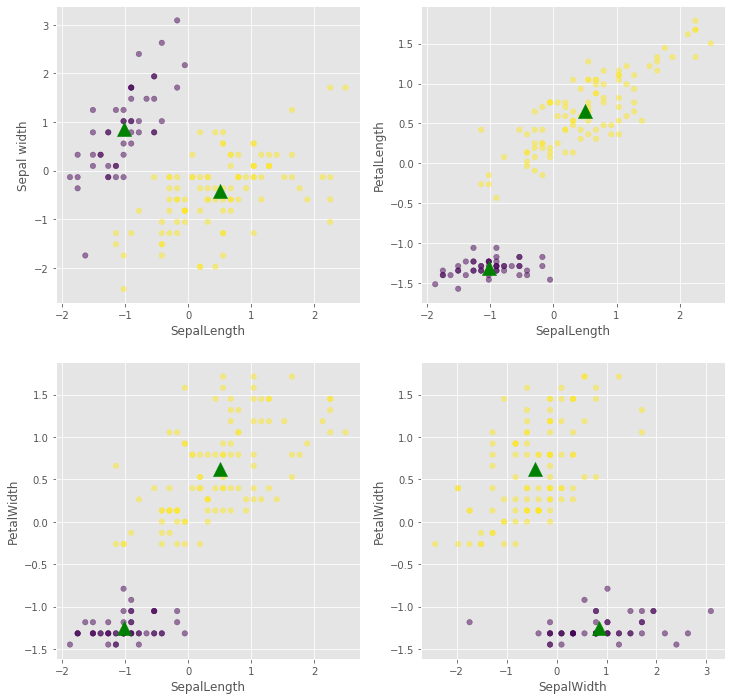

In [19]:
plt.figure(figsize=(12, 12))

ax1=plt.subplot(221)
#puntos
ax1.scatter(X[:, 0], X[:, 1], c=labels,alpha=0.5,s=30)
#centroides
ax1.scatter(centroids[0][0],centroids[0][1], c='g',s=200,marker=u'^')
ax1.scatter(centroids[1][0],centroids[1][1], c='g',s=200,marker=u'^')

ax1.set_xlabel('SepalLength')
ax1.set_ylabel('Sepal width')

ax2=plt.subplot(222)
#puntos
ax2.scatter(X[:, 0], X[:, 2], c=labels,alpha=0.5,s=30)
#centroides
ax2.scatter(centroids[0][0],centroids[0][2], c='g',s=200,marker=u'^')
ax2.scatter(centroids[1][0],centroids[1][2], c='g',s=200,marker=u'^')

ax2.set_xlabel('SepalLength')
ax2.set_ylabel('PetalLength')

ax3=plt.subplot(223)
#puntos
ax3.scatter(X[:, 0], X[:, 3], c=labels,alpha=0.5,s=30)
#centroides
ax3.scatter(centroids[0][0],centroids[0][3], c='g',s=200,marker=u'^')
ax3.scatter(centroids[1][0],centroids[1][3], c='g',s=200,marker=u'^')

ax3.set_xlabel('SepalLength')
ax3.set_ylabel('PetalWidth')

ax4=plt.subplot(224)
#puntos
ax4.scatter(X[:, 1], X[:, 3], c=labels,alpha=0.5,s=30)
#centroides
ax4.scatter(centroids[0][1],centroids[0][3], c='g',s=200,marker=u'^')
ax4.scatter(centroids[1][1],centroids[1][3], c='g',s=200,marker=u'^')

ax4.set_xlabel('SepalWidth')
ax4.set_ylabel('PetalWidth');

## 4. Evaluando los clusters

Ahora, usemos algunas de las medidas que vimos recién para evaluar los clusters que construimos.

In [20]:
import sklearn.metrics as sm

### 4.1 Validación Externa

En este caso (poco habitual) tenemos una variable externa (la especie de la flor) que "coincide" con los clusters -conceptualmente hablando-. Habitualmente, quizás podamos encontrar alguna de alguna variable a la que podemos considerar como altamente correlacionada con nuestros clusters y que podamos usar como fuente de validación externa de nuestro clustering.

#### 4.1.1 Accuracy

In [21]:
sm.accuracy_score(y, labels)

0.6666666666666666

#### 4.1.2 Classification Report

In [22]:
print(sm.classification_report(y, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.50      1.00      0.67        50
           2       0.00      0.00      0.00        50

    accuracy                           0.67       150
   macro avg       0.50      0.67      0.56       150
weighted avg       0.50      0.67      0.56       150



C:\Users\mbeati\AppData\Local\Continuum\anaconda3\envs\dsdh2\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 4.1.3 Confusion Matrix

In [23]:
print(sm.confusion_matrix(y, labels))

[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]


### 4.2 Validación Interna

#### 4.2.1 Silhouette Score 

In [24]:
sm.silhouette_score(X, labels, metric='euclidean')

0.5817500491982808

#### 4.2.2 Calinsky-Harabaz Index

In [25]:
sm.calinski_harabasz_score(X, labels)  

251.34933946458108

#### Definiendo la cantidad de clusters:

In [26]:
evaluation = []
for k in range(2,9):
    
    #Como siempre, suele ser una buena práctica fijar la semilla
    kmeans = cluster.KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    accuracy = sm.accuracy_score(y, labels)
    silhouette = sm.silhouette_score(X, labels, metric='euclidean')
    calinsky = sm.calinski_harabasz_score(X, labels)      
    evaluation = [(k, accuracy, silhouette, calinsky)]
    print("K= ", evaluation)

K=  [(2, 0.6666666666666666, 0.5817500491982808, 251.34933946458108)]
K=  [(3, 0.24, 0.45994823920518635, 241.90440170183157)]
K=  [(4, 0.26666666666666666, 0.3850454053045392, 206.68060327399542)]
K=  [(5, 0.18, 0.3459012795948779, 202.95152531739166)]
K=  [(6, 0.4533333333333333, 0.32203661257077404, 187.14011028654735)]
K=  [(7, 0.34, 0.3276942451516975, 177.48032675981423)]
K=  [(8, 0.3, 0.3406168966939047, 174.4125778094569)]


Sabemos que debería dar mejor con k=3. ¿Por qué no lo vemos?

In [27]:
#Como siempre, suele ser una buena práctica fijar la semilla
kmeans = cluster.KMeans(n_clusters=3, random_state=0) 
kmeans.fit(X)
labels = kmeans.labels_

In [28]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [29]:
print(sm.classification_report(y, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.77      0.72      0.74        50

    accuracy                           0.24       150
   macro avg       0.26      0.24      0.25       150
weighted avg       0.26      0.24      0.25       150



In [30]:
print(sm.confusion_matrix(y, labels))

[[ 0 50  0]
 [39  0 11]
 [14  0 36]]


El problema es que están invertidas las etiquetas. Kmeans no sabe en qué orden tenemos las clases en el dataset de iris. Lo tenemos que corregir a mano.

In [31]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [32]:
predY = np.choose(labels, [1, 0, 2]).astype(np.int64)

In [33]:
predY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [34]:
print(sm.confusion_matrix(y, predY))

[[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]


In [35]:
print(sm.classification_report(y, predY))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [36]:
sm.accuracy_score(y, predY)

0.8333333333333334

Obviamente, las métricas de validación interna no cambian:

In [37]:
sm.silhouette_score(X, predY, metric='euclidean')

0.45994823920518635

In [38]:
sm.calinski_harabasz_score(X, predY)  

241.90440170183157